Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Alexey Adamsky"

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices.

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

# **Data Preparation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('car_data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## **Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

In [7]:
fuel_type = pd.get_dummies(df['Fuel_Type'])
transmission = pd.get_dummies(df['Transmission'])
seller_type = pd.get_dummies(df['Seller_Type'])

In [8]:
fuel_type.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [9]:
df = pd.concat([df, fuel_type, transmission, seller_type],axis=1)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

In [12]:
df['Year'].unique().max()

2018

In [13]:
df['new_old'] = df['Year'].apply(lambda year: 'new' if year >= 2016 else 'old' )

In [14]:
df[['Year', 'new_old']].head()

,Year,new_old
0,2014,old
1,2013,old
2,2017,new
3,2011,old
4,2014,old


## **Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

In [15]:
# convert everything to 100s

In [16]:
df['Kms_Driven'] = round(df['Kms_Driven'] / 100).astype(int)

In [17]:
df['Selling_Price'] = round(df['Selling_Price'] * 10).astype(int)

In [18]:
df['Present_Price'] = round(df['Present_Price'] * 10).astype(int)

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,new_old
0,ritz,2014,34,56,270,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
1,sx4,2013,48,95,430,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
2,ciaz,2017,72,98,69,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,new
3,wagon r,2011,28,42,52,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
4,swift,2014,46,69,424,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int32 
 3   Present_Price  301 non-null    int32 
 4   Kms_Driven     301 non-null    int32 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int64 
 9   CNG            301 non-null    uint8 
 10  Diesel         301 non-null    uint8 
 11  Petrol         301 non-null    uint8 
 12  Automatic      301 non-null    uint8 
 13  Manual         301 non-null    uint8 
 14  Dealer         301 non-null    uint8 
 15  Individual     301 non-null    uint8 
 16  new_old        301 non-null    object
dtypes: int32(3), int64(2), object(5), uint8(7)
memory usage: 22.2+ KB


# **Exploratory Analysis**

## **Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int32 
 3   Present_Price  301 non-null    int32 
 4   Kms_Driven     301 non-null    int32 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int64 
 9   CNG            301 non-null    uint8 
 10  Diesel         301 non-null    uint8 
 11  Petrol         301 non-null    uint8 
 12  Automatic      301 non-null    uint8 
 13  Manual         301 non-null    uint8 
 14  Dealer         301 non-null    uint8 
 15  Individual     301 non-null    uint8 
 16  new_old        301 non-null    object
dtypes: int32(3), int64(2), object(5), uint8(7)
memory usage: 22.2+ KB


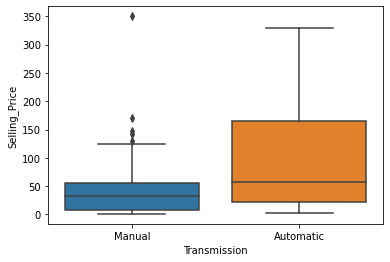

In [22]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df);
# Automatic transmission cars seem to be more expensive
# And half of automatic transmission cars are price above
# the 75th percentile of the manual transmission cars

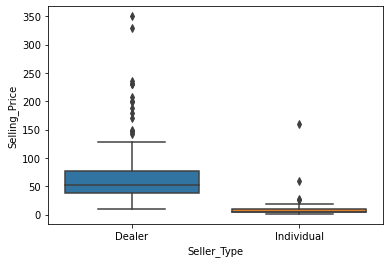

In [23]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df);
# dealers tent to sell cars for more money as compared to owners

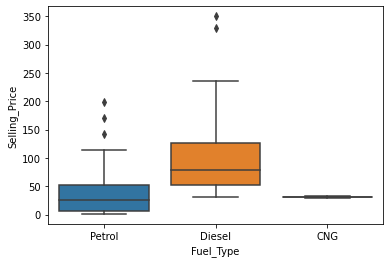

In [24]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df);
# most of disel cars cost higher than the pertol ones

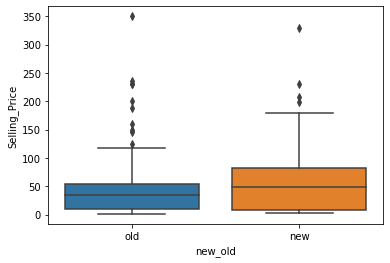

In [25]:
sns.boxplot(x='new_old', y='Selling_Price', data=df);
# selling price seem to be normally destributed for both new and old cars
# with some overpriced cars in both categories

## **Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?

In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,new_old
0,ritz,2014,34,56,270,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
1,sx4,2013,48,95,430,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
2,ciaz,2017,72,98,69,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,new
3,wagon r,2011,28,42,52,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
4,swift,2014,46,69,424,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old


In [27]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,46.601329,76.308970,369.465116,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159
std,2.891554,50.828606,86.424693,388.868071,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439
min,2003.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,9.000000,12.000000,150.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2014.000000,36.000000,64.000000,320.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,60.000000,99.000000,488.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,350.000000,926.000000,5000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([194.,  79.,  15.,   6.,   5.,   0.,   2.]),
 array([  1.        ,  50.85714286, 100.71428571, 150.57142857,
        200.42857143, 250.28571429, 300.14285714, 350.        ]),
 <BarContainer object of 7 artists>)

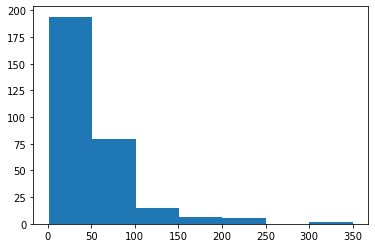

In [28]:
plt.hist(df['Selling_Price'], bins=(int(df['Selling_Price'].max()/50)))
# wast majority of cars selling price is under 10K

(array([128., 110.,  35.,  11.,   7.,   5.,   3.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.        ,  54.27777778, 105.55555556, 156.83333333,
        208.11111111, 259.38888889, 310.66666667, 361.94444444,
        413.22222222, 464.5       , 515.77777778, 567.05555556,
        618.33333333, 669.61111111, 720.88888889, 772.16666667,
        823.44444444, 874.72222222, 926.        ]),
 <BarContainer object of 18 artists>)

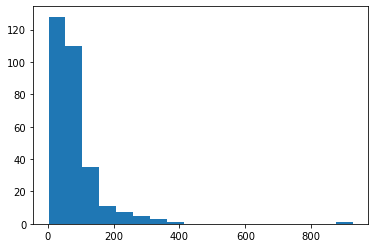

In [29]:
plt.hist(df['Present_Price'], bins=int(df['Present_Price'].max()/50))
# wast majority of cars' present price is under 15K

(array([  3.,   4.,   6.,   7.,  21.,  19.,  56.,  38., 111.,  36.]),
 array([2003. , 2004.5, 2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5,
        2015. , 2016.5, 2018. ]),
 <BarContainer object of 10 artists>)

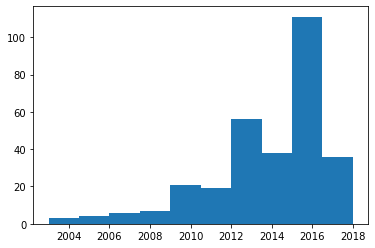

In [30]:
plt.hist(df['Year'])
# most cars were amde after or during 2012

(array([236.,  57.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   5. ,  504.5, 1004. , 1503.5, 2003. , 2502.5, 3002. , 3501.5,
        4001. , 4500.5, 5000. ]),
 <BarContainer object of 10 artists>)

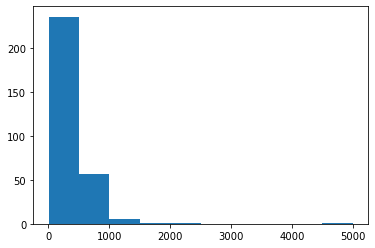

In [31]:
plt.hist(df['Kms_Driven'])
# mWast majority of cars has driven under 5K kms

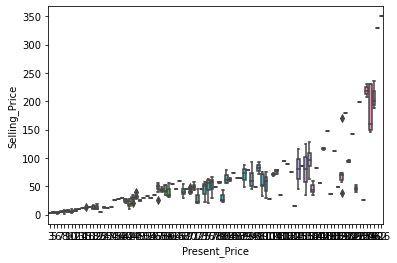

In [32]:
sns.boxplot(x='Present_Price', y='Selling_Price', data=df);
# the higher the present price the more spread there is in the selling price

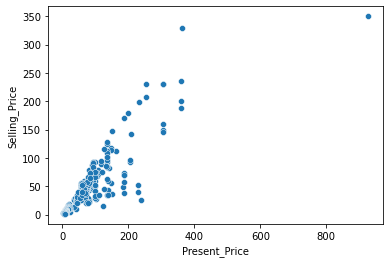

In [33]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df);

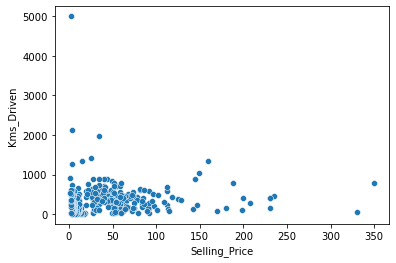

In [34]:
sns.scatterplot(x='Selling_Price', y='Kms_Driven', data=df);
# there doesn't seem to be much correlation between the kms driven
# and the selling price

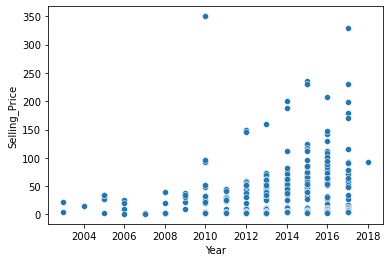

In [35]:
sns.scatterplot(x='Year', y='Selling_Price', data=df);
# there seens to be a slight price increase the newer the car is

# **Regression Model**

## **Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.

In [36]:
# We can try to test the Selling Price against KMs driven and a Year

## **Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

In [37]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'CNG', 'Diesel',
       'Petrol', 'Automatic', 'Manual', 'Dealer', 'Individual', 'new_old'],
      dtype='object')

In [38]:
Y = df['Selling_Price']
X = df[['Kms_Driven', 'Year']]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [40]:
x_train.shape

(240, 2)

In [41]:
x_test.shape

(61, 2)

In [42]:
model = LinearRegression().fit(x_train, y_train)

In [43]:
print(model.coef_)
print(model.intercept_)

[0.02466794 6.07533253]
-12193.746141185004


In [44]:
pred = model.predict(x_test)

In [45]:
test_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_r2 = r2_score(y_test, pred)
print(test_rmse) #the lower the value, the better the fit
print(test_r2) #the closer to 1, the better the fit

39.84398763061474
0.04875833223324999


In [46]:
# since our R2 is negative we seem to have a horrible fit

In [47]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
actual_vs_predicted
# and we can see how far our predicted values from the actual ones

,Actual,Predicted
201,32,31.979639
211,118,58.779451
208,79,61.038273
298,34,33.280020
128,8,60.939601
...,...,...
116,11,44.038652
154,5,43.947000
15,78,64.731444
62,188,61.214557


## **Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [48]:
# First of all we have very little data, more data could improve
# the performance of our model.
# Since we are trying to predict the selling price, maybe we could
# split it into different categories, e.g. Dealer vs Owner, etc.
# with the hopes that within that category we have a much stonger
# correlation between age, kilometrage and the selling price